   # Introduction to Data Science
   ## Indian Liver Patient Dataset 

### Team details :


Parul Shandilya      16ucs126



Priyansi Singh       16ucs143



Saloni Goyal         16ucc083



Srishti Agarwal      16ucc095

### Objective

### Our problem statement is to use the given patient records to determine which patients have liver disease and which ones do not and applying ML Classification algorithms on the data set to get inferences from the data.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

## Table Description

In [66]:
#importing the KAGGLE Indian Liver Patient dataset
df = pd.read_csv('indian_liver_patient.csv')
data=df.values
print(type(data))
#finding number of rows and columns
print(data.shape)

<type 'numpy.ndarray'>
(583, 11)


### 1. There are 583 rows and 11 columns in the dataset

In [44]:
### First 10 entries of the dataset
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### 2. Column Description
#### Age : Age of the patients
#### Gender : Sex of the patients
#### Total_Bilirubin : Total Billirubin in mg/dL
#### Direct_Bilirubin : Conjugated Billirubin in mg/dL
#### Alkaline_Phosphotase : ALP in IU/L
#### Alamine_Aminotransferase : ALT in IU/L
#### Aspartate_Aminotransferase : AST in IU/L
#### Total_Protiens : Total Proteins g/dL
#### Albumin : Albumin in g/dL
#### Albumin_and_Globulin_Ratio : A/G ratio
#### Dataset : Label (patient has liver disease (1) or not (2))

In [45]:
#attributes of dataset
df.columns

Index([u'Age', u'Gender', u'Total_Bilirubin', u'Direct_Bilirubin',
       u'Alkaline_Phosphotase', u'Alamine_Aminotransferase',
       u'Aspartate_Aminotransferase', u'Total_Protiens', u'Albumin',
       u'Albumin_and_Globulin_Ratio', u'Dataset'],
      dtype='object')

### Description of the attributes

In [46]:
#Checking if any attribute is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:

1) Only gender is non-numeric veriable. All others are numeric.


2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.


### Finding contribution of 1 and 2 in Dataset


In [47]:
# Division of data into 1 and 2 ()
#.countplot(df['Dataset'],label="Count")
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

1 represents patients with liver disease and 2 represents patients with no liver disease.
Out of 583 patients,416 are diagnosed with liver disease and 167 are not diagnosed with liver disease.

## Data Overview

### Bar Graph

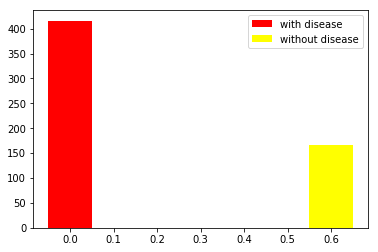

In [48]:
indices1= np.array([0])
count1= np.array([416])
indices2= np.array([0])
count2= np.array([167])
plt.bar(indices1,count1,0.1,color='red',label='with disease')
plt.bar(indices2+0.6,count2,0.1,color='yellow',label='without disease')
plt.legend()
plt.show()

### Pie Chart

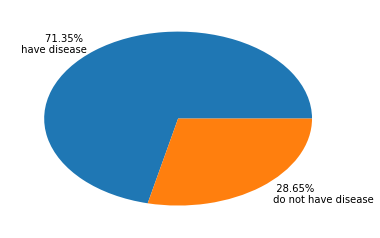

In [49]:
labels = ['71.35% \n have disease','  28.65% \n do not have disease']
values = [416,167]
plt.pie(values,labels=labels,radius=1)
plt.show()


71.35% of the total population has liver disease while 28.65% of the total population does not have liver disease. 

#### This is a class imbalance problem.

## Data Preprocessing

### Deleting rows with missing values

#### Checking if any row has missing attribute

In [50]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Albumin_and_Globulin_Ratio    4
dtype: int64

In [51]:
print(df[df["Albumin_and_Globulin_Ratio"].isnull()][null_columns])

     Albumin_and_Globulin_Ratio
209                         NaN
241                         NaN
253                         NaN
312                         NaN


#### Removing those rows

In [52]:
data=df.copy()
data=data.dropna(how='any',axis=0)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Although we loose some data due to this data cleaning, we have to remove these entries inorder to process the data further.

### Binarization

Since we have gender as categorical attribute in our dataset , for further analysis , we need to convert this attribute into numerical data. 

In [53]:
data.Gender = [1 if each == "Male" else 0 for each in data.Gender]

Here assigning value 0 to female gender and value 1 to male gender.


### Normalization


Since all the attributes in the dataset have varying ranges , we first need to normalize them in order to bring all the attribute values in same range so that while calculating distance one attribute does not have dominance over others.

In [54]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
data1=normalize(data)
data1.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0
5,0.488372,1.0,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,0.0
6,0.255814,0.0,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.280,0.0
7,0.290698,0.0,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,0.0
8,0.151163,1.0,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.360,1.0
9,0.593023,1.0,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.280,0.0


After normalization , all attribute values lie between 0 and 1

# Data Analysis

### Box Plot 

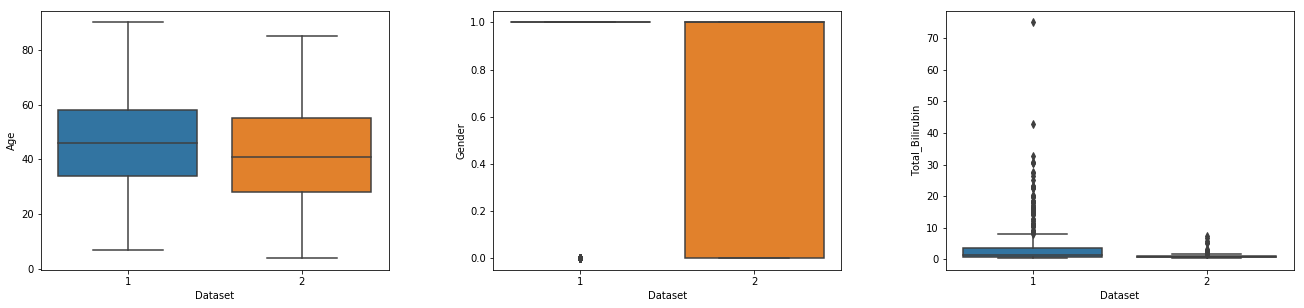

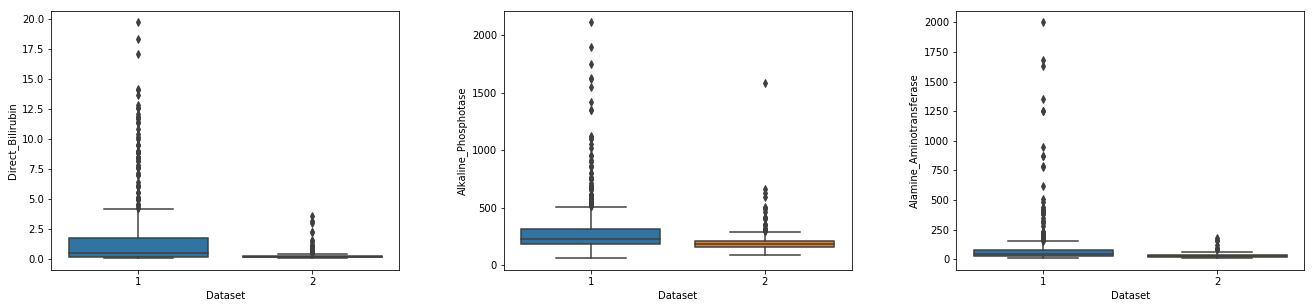

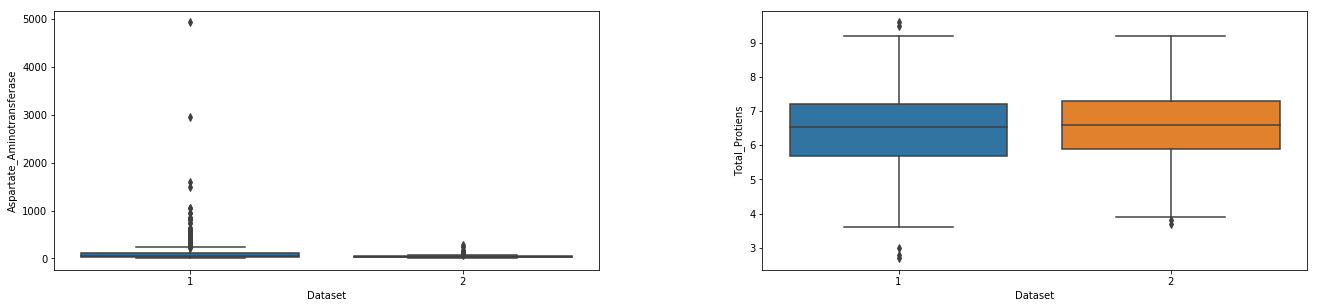

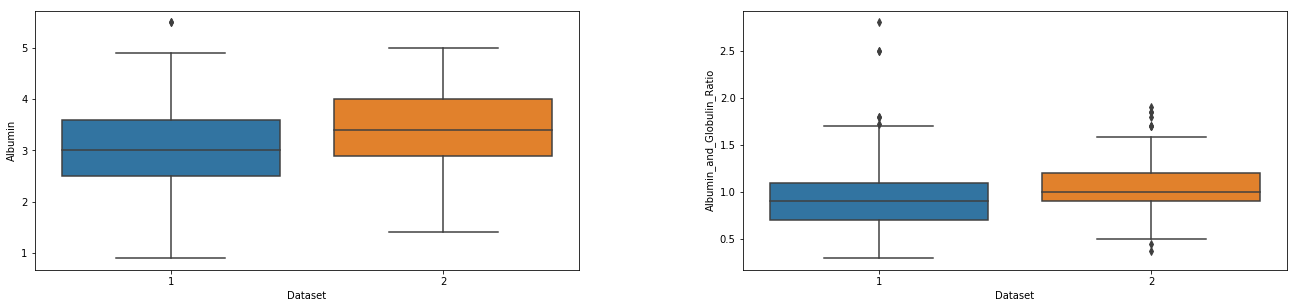

In [55]:

left  = 0.1  
right = 3    
bottom = 0.1 
top = 1      
wspace = 0.3  
hspace = 0.2   

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Age', data = data,   ax=axes[0])
sns.boxplot('Dataset', 'Gender', data = data,  orient='v' , ax=axes[1])
sns.boxplot('Dataset', 'Total_Bilirubin', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Direct_Bilirubin', data = data,  orient='v' , ax=axes[0])
sns.boxplot('Dataset', 'Alkaline_Phosphotase', data = data,  orient='v' , ax=axes[1])
sns.boxplot('Dataset', 'Alamine_Aminotransferase', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Aspartate_Aminotransferase', data = data,  orient='v' , ax=axes[0])
sns.boxplot('Dataset', 'Total_Protiens', data = data,  orient='v' , ax=axes[1])


f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Albumin', data = data,  orient='v' , ax=axes[0])
sns.boxplot('Dataset', 'Albumin_and_Globulin_Ratio', data = data,  orient='v' , ax=axes[1])



### Scatter Plot

From the box plot , we can observe that aged people have greater risk of liver disease .  
y-axis
Gender
1: Male
0: Female
Rest
Amount
x-axis
1: Disease
2: Non Disease
Gender dataset box plot Median is 1 that is Male

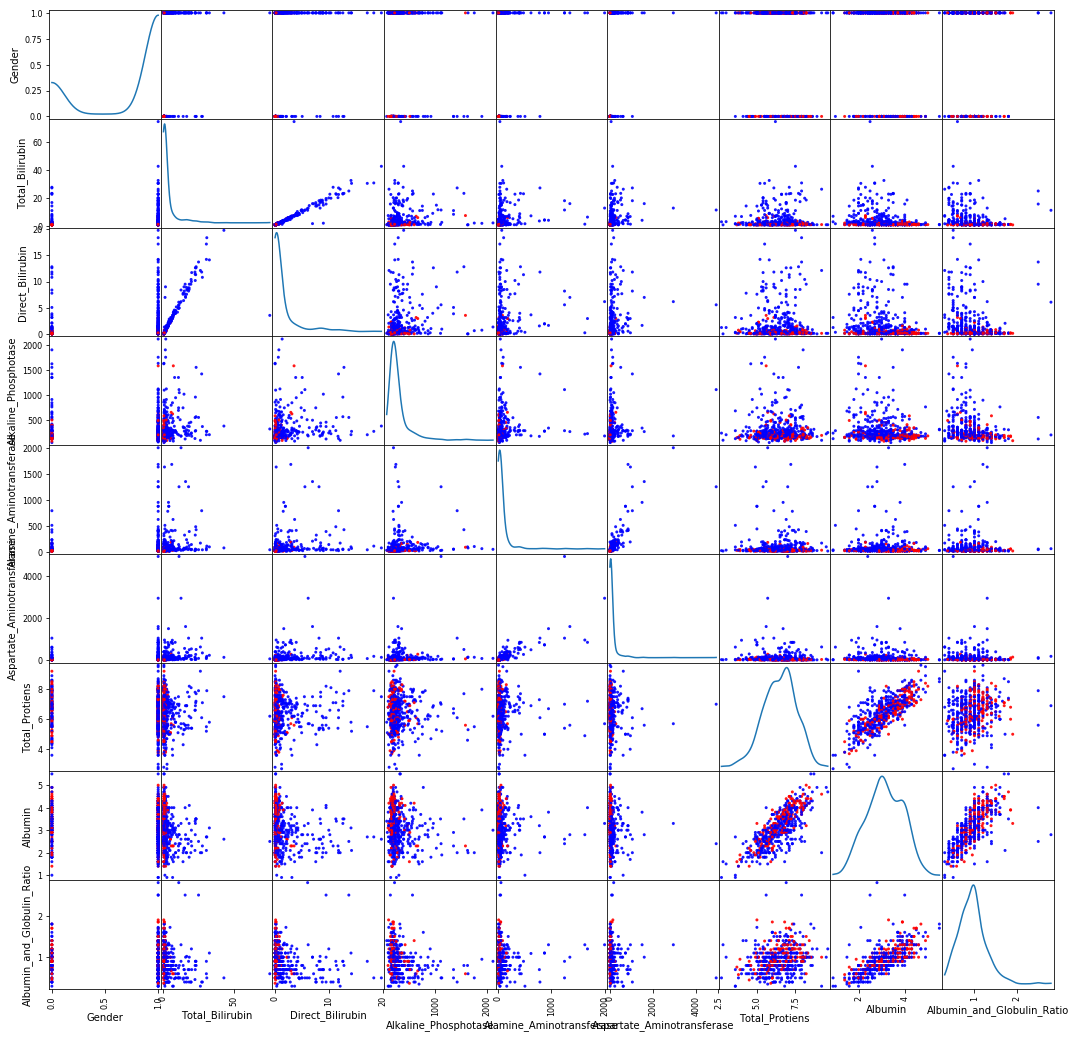

In [56]:
observables = data.iloc[:,1:10]
color_wheel = {1: "blue", 2: "red"}
colors = data["Dataset"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.9, figsize = (18, 18), diagonal = 'kde');

From the scatter plot , it seems that Direct_Bilirubin is strongly correlated with Total_Bilirium . Also , Albumin and Total_Protiens are roughly correlated. 

## Correlation Matrix

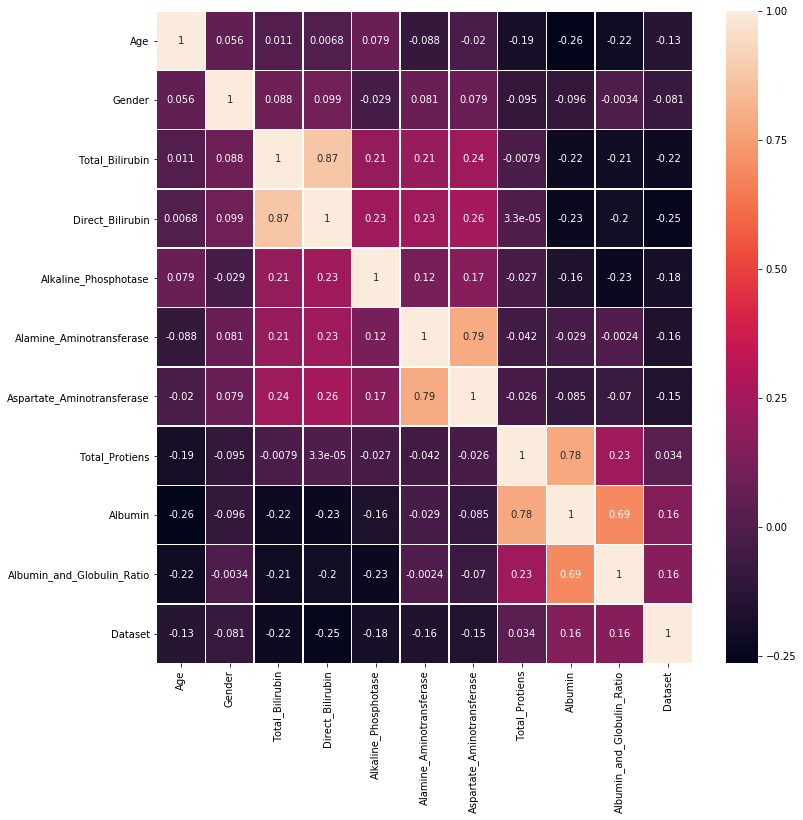

In [57]:
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)


By observing the correlation matrix  , we can say that Total_Proteins is least correlated with Dataset (class label). Thus , we can drop this attribute.

In [58]:
data.drop(['Total_Protiens'],axis=1,inplace=True)

### Principal Component Analysis 

In [59]:
# useful_data
useful_data = data.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(useful_data)

# Dimmension indexing
dimmensions  = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4),columns=useful_data.keys())
components.index = dimmensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variancce_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variancce_rations.index = dimmensions

print(pd.concat([variancce_rations, components], axis=1))

             Explained Variance  Gender  Total_Bilirubin  Direct_Bilirubin  \
Dimension 1              0.6278  0.0001           0.0050            0.0025   
Dimension 2              0.3170 -0.0001           0.0033            0.0017   
Dimension 3              0.0550 -0.0001          -0.0006           -0.0004   

             Alkaline_Phosphotase  Alamine_Aminotransferase  \
Dimension 1                0.2433                    0.4759   
Dimension 2                0.9697                   -0.1372   
Dimension 3               -0.0198                   -0.8687   

             Aspartate_Aminotransferase  Albumin  Albumin_and_Globulin_Ratio  \
Dimension 1                      0.8452  -0.0002                     -0.0001   
Dimension 2                     -0.2019  -0.0005                     -0.0003   
Dimension 3                      0.4949  -0.0006                     -0.0003   

             Dataset  
Dimension 1  -0.0003  
Dimension 2  -0.0002  
Dimension 3   0.0002  


It can be observed that 62.78% variance is explained in dimension 1.Rest of the dimensions contribute less to the variance as compared to the first one.
In dimension 1 most of the feature weight is associated with Aspartate_Aminotransferase and Alamine_Aminotransferase.Thus these two attributes will be important for analysis.Attributes such as Total_Bilirubin and Direct_Bilirubin have very less weight associated with them and thus , dropping them won't affect our analysis .

In [60]:
#Dropping the above stated attributes.
data.drop(['Total_Bilirubin','Direct_Bilirubin'],axis=1,inplace=True)

## Classifcation and Prediction
### Choosing Classification Model
We would use KNN method of classification as the dataset is small and almost numerical. Also since we have binary classification ( 1 for patient having disease and 2 for patient not having disease), Logistic Regression model can be used here.
 


### Splitting dataset into Test data and Training Data

In [61]:
from sklearn.model_selection import train_test_split
x =  data.iloc[:,1:10]
X_train, X_test, y_train, y_test = train_test_split(x, data['Dataset'], test_size=0.20,random_state=38)

## KNN classifier and Classification model

[0.7492 0.7049 0.7283 0.6989 0.7143 0.6994 0.7084 0.7032 0.7109 0.7018
 0.7155 0.6926 0.7154 0.6969 0.7048 0.6898 0.7095 0.6917 0.7067 0.7058
 0.7206 0.7033 0.7249 0.7074]


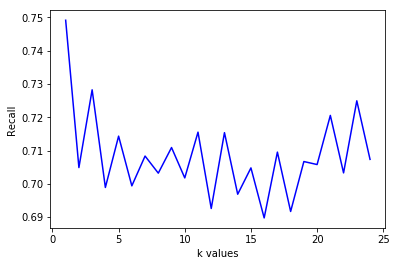

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
k_range=list(range(1,25))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='precision')
    k_scores.append(scores.mean())
print(np.round(k_scores,4)) 
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

We can not take value of k as 1 (eventhough it has maximum recall) as such a small value of k can lead to noise sensitive classification.We need a trade-off between k-value and recall Thus , we choose a value of k such that niether it is too small nor too large.Also, recall should not  be compromised. Here , we take k-value as 8. 

### Testing

We are using manhattan approach to find distance since we have categorical data here.

('Confusion matrix\n', array([[88,  7],
       [14,  7]]), '\n')
Confusion matrix plot


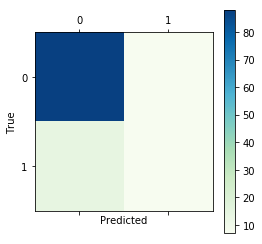

Classfication report
              precision    recall  f1-score   support

           1       0.86      0.93      0.89        95
           2       0.50      0.33      0.40        21

   micro avg       0.82      0.82      0.82       116
   macro avg       0.68      0.63      0.65       116
weighted avg       0.80      0.82      0.80       116

Accuracy score
0.8189655172413793


In [63]:
#Fit training data
classifier = KNeighborsClassifier(n_neighbors=8,metric='manhattan')  
classifier.fit(X_train, y_train) 
# Prediction on test data
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

Since we have class imbalance problem here , calculating accuracy is not a good measure for  evaluation of classifiaction models . Hence , we need to calculate SENSITIVITY ( true positive recognition rate) and SPECIFICITY(true negative recognition rate).


Sensitivity = TP/P = 111/120 = 0.925
Specificity = TN/N = 17/25 = 0.68

## Logistic Regression  and Classifiaction Report

('Accuracy: ', 0.9827586206896551)


('Classification Report: \n', u'              precision    recall  f1-score   support\n\n           1       0.98      1.00      0.99        82\n           2       1.00      0.94      0.97        34\n\n   micro avg       0.98      0.98      0.98       116\n   macro avg       0.99      0.97      0.98       116\nweighted avg       0.98      0.98      0.98       116\n')


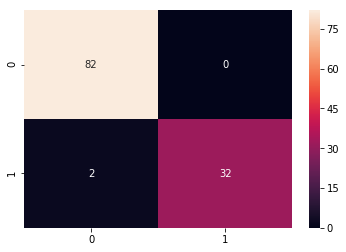

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, data['Dataset'], test_size=0.20, random_state=101)

#Logistic Regression
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
#print('Logistic Regression Training Score: \n', logreg_score)
#print('Logistic Regression Test Score: \n', logreg_score_test)
#print('Coefficient: \n', logreg.coef_)
#print('Intercept: \n', logreg.intercept_)
print('Accuracy: ', accuracy_score(y_test,log_predicted))
print('\n')
#print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
#print('Classification Report: \n', classification_report(y_test,log_predicted))


print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")




For the same reasons mentiones above , we have to calculate SENSITIVITY and SPECIFICTY here also.
Here,

    Sensitivity = TP/P = 82/82 = 1
    Specificity = TN/N = 32/34 = 0.94

## Inferences drawn from the above 2 classifications

Since Sensitivity and Specificity are better in case of Logistic Regression along with the accuracy , it is a better classification model for our dataset